<a href="https://colab.research.google.com/github/ab-sa/Statistical-Machine-Learning-2/blob/main/Lecture3_Dummies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import Credit data

In [ ]:
Credit = pd.read_csv('Credit.csv')
Insurance = pd.read_csv('Insurance.csv')
print('Dimension of the data: ' + str(Credit.shape))
Credit.head()

Dimension of the data: (400, 12)


,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


Levels of Gender and Ethnicity:

In [ ]:
print('Gender:')
print(Credit['Gender'].value_counts())
print('Ethnicity:')
print(Credit['Ethnicity'].value_counts())
print(Credit['Ethnicity'].value_counts(normalize=True))

Gender:
Female    207
 Male     193
Name: Gender, dtype: int64
Ethnicity:
Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64
Caucasian           0.4975
Asian               0.2550
African American    0.2475
Name: Ethnicity, dtype: float64


Dummy variabes for categorical predictors:

In [ ]:
Credit_dumms = pd.get_dummies(Credit[['Balance', 'Gender', 'Ethnicity']])
Credit_dumms

,Balance,Gender_ Male,Gender_Female,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,333,1,0,0,0,1
1,903,0,1,0,1,0
2,580,1,0,0,1,0
3,964,0,1,0,1,0
4,331,1,0,0,0,1
...,...,...,...,...,...,...
395,560,1,0,0,0,1
396,480,1,0,1,0,0
397,138,0,1,0,0,1
398,0,1,0,0,0,1


Fit LR models with categorical predictors - using sklearn:

Attempt 1: repeat something similar as before

In [ ]:
reg_Gender = LinearRegression().fit(Credit_dumms[['Gender_Female', 'Gender_ Male']], Credit_dumms['Balance'])

print('Regression Coefficients for Gender model: ', [round(item, 2) for item in reg_Gender.coef_])

Regression Coefficients for Gender model:  [1.7203792867472128e+16, 1.7203792867472128e+16]


Unfortunately, `LinearRegression().fit()` does not automatically removes one of the dummies itself... so we need to do this manually.
We will see more categorical-friednly functions soon!

Attempt 2:

In [ ]:
reg_Gender = LinearRegression().fit(Credit_dumms[['Gender_Female']], Credit_dumms['Balance'])
reg_Ethnicity = LinearRegression().fit(Credit_dumms[['Ethnicity_Asian', 'Ethnicity_Caucasian']], Credit_dumms['Balance'])

print('Regression Coefficients for Gender model: ', [round(item, 2) for item in reg_Gender.coef_])
print('Regression Coefficients for Ethnicity model : ', [round(item, 2) for item in reg_Ethnicity.coef_])

Regression Coefficients for Gender model:  [19.73]
Regression Coefficients for Ethnicity model :  [-18.69, -12.5]


Attempt 3: Fit LR models with categorical predictors - using statsmodels:

In [ ]:
reg_Gender = smf.ols(formula = "Balance ~ Gender", data = Credit).fit()
print(reg_Gender.summary())

reg_Ethnicity = smf.ols(formula = "Balance ~ Ethnicity", data = Credit).fit()
print(reg_Ethnicity.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Thu, 02 Dec 2021   Prob (F-statistic):              0.669
Time:                        02:45:47   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          509.8031     33.128  

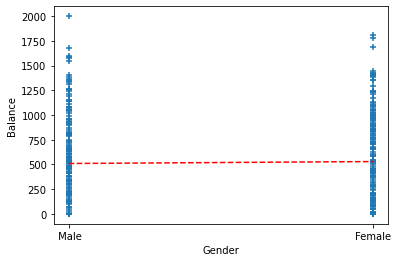

In [ ]:
plt.scatter(Credit.Gender, Credit.Balance, marker = "+")
plt.plot([0, 1], [np.mean(Credit.query("Gender == ' Male'").Balance), np.mean(Credit.query("Gender == 'Female'").Balance)], 'r--')
plt.ylabel("Balance")
plt.xlabel("Gender")
plt.show()

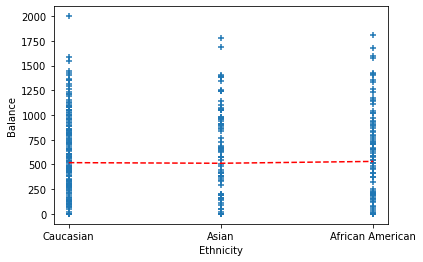

In [ ]:
plt.scatter(Credit.Ethnicity, Credit.Balance, marker = "+")
plt.plot([0, 1, 2], [np.mean(Credit.query("Ethnicity == 'Caucasian'").Balance),
                  np.mean(Credit.query("Ethnicity == 'Asian'").Balance),
                  np.mean(Credit.query("Ethnicity == 'African American'").Balance)], 'r--')
plt.ylabel("Balance")
plt.xlabel("Ethnicity")
plt.show()

In [ ]:
Credit_group = Credit.groupby("Ethnicity")
Credit_group.Balance.agg([lambda x: x.shape[0], np.mean, np.std])

,<lambda_0>,mean,std
Ethnicity,,,
African American,99,531.000000,485.632745
Asian,102,512.313725,481.402468
Caucasian,199,518.497487,436.946693


Transformations:

1. on one feature: e.g., log, sqrt, inverse, etc.
2. on multiple features: interactions

- Linear model on one feature:

In [ ]:
reg_Limit_lin = smf.ols(formula = "Balance ~ Income", data = Credit).fit()

print(reg_Limit_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           1.03e-22
Time:                        03:53:30   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.0

- Linear model on log of one feature:

In [ ]:
reg_Limit_log = smf.ols(formula = "Balance ~ np.log(Income)", data = Credit).fit()

print(reg_Limit_log.summary())

- Linear model on two features (numeric & categorical):

In [ ]:
reg_Limit_Gen = smf.ols(formula = "Balance ~ Income + Gender", data = Credit).fit()

print(reg_Limit_Gen.summary())

- Linear model on two features with interaction:

In [ ]:
reg_Limit_Gen_int = smf.ols(formula = "Balance ~ Income * Ethnicity", data = Credit).fit()

print(reg_Limit_Gen_int.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     22.45
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           7.98e-20
Time:                        03:56:44   Log-Likelihood:                -2969.2
No. Observations:                 400   AIC:                             5950.
Df Residuals:                     394   BIC:                             5974.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

[]

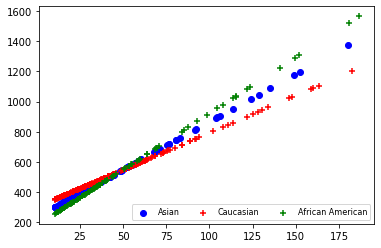

In [ ]:
Credit['pred'] = reg_Limit_Gen_int.predict()

plt.scatter(Credit.query("Ethnicity == 'Asian'").Income, Credit.query("Ethnicity == 'Asian'").pred, c = "b", marker = "o")
plt.scatter(Credit.query("Ethnicity == 'Caucasian'").Income, Credit.query("Ethnicity == 'Caucasian'").pred, c = "r", marker = "+")
plt.scatter(Credit.query("Ethnicity == 'African American'").Income, Credit.query("Ethnicity == 'African American'").pred, c = "g", marker = "+")
plt.legend(('Asian', 'Caucasian', 'African American'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=8)
plt.plot()